In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

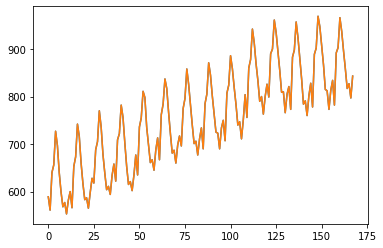

In [135]:
training_set = pd.read_csv('d2.csv')

training_set = training_set.iloc[:,1:2].values

plt.plot(training_set, label = 'Shampoo Sales Data')
plt.plot(training_set, label = 'Airline Passangers Data')
plt.show()

In [136]:
training_set

array([[589],
       [561],
       [640],
       [656],
       [727],
       [697],
       [640],
       [599],
       [568],
       [577],
       [553],
       [582],
       [600],
       [566],
       [653],
       [673],
       [742],
       [716],
       [660],
       [617],
       [583],
       [587],
       [565],
       [598],
       [628],
       [618],
       [688],
       [705],
       [770],
       [736],
       [678],
       [639],
       [604],
       [611],
       [594],
       [634],
       [658],
       [622],
       [709],
       [722],
       [782],
       [756],
       [702],
       [653],
       [615],
       [621],
       [602],
       [635],
       [677],
       [635],
       [736],
       [755],
       [811],
       [798],
       [735],
       [697],
       [661],
       [667],
       [645],
       [688],
       [713],
       [667],
       [762],
       [784],
       [837],
       [817],
       [767],
       [722],
       [681],
       [687],
       [660],
      

In [161]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [141]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [240]:
num_epochs = 20000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    #print(outputs)
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.20406
Epoch: 100, loss: 0.01992
Epoch: 200, loss: 0.01079
Epoch: 300, loss: 0.01063
Epoch: 400, loss: 0.00941
Epoch: 500, loss: 0.00931
Epoch: 600, loss: 0.00921
Epoch: 700, loss: 0.00911
Epoch: 800, loss: 0.00899
Epoch: 900, loss: 0.00886
Epoch: 1000, loss: 0.00875
Epoch: 1100, loss: 0.00865
Epoch: 1200, loss: 0.00856
Epoch: 1300, loss: 0.00848
Epoch: 1400, loss: 0.00838
Epoch: 1500, loss: 0.00828
Epoch: 1600, loss: 0.00817
Epoch: 1700, loss: 0.00803
Epoch: 1800, loss: 0.00776
Epoch: 1900, loss: 0.00757
Epoch: 2000, loss: 0.00749
Epoch: 2100, loss: 0.00743
Epoch: 2200, loss: 0.00738
Epoch: 2300, loss: 0.00732
Epoch: 2400, loss: 0.00725
Epoch: 2500, loss: 0.00719
Epoch: 2600, loss: 0.00712
Epoch: 2700, loss: 0.00704
Epoch: 2800, loss: 0.00695
Epoch: 2900, loss: 0.00685
Epoch: 3000, loss: 0.00671
Epoch: 3100, loss: 0.00654
Epoch: 3200, loss: 0.00639
Epoch: 3300, loss: 0.00626
Epoch: 3400, loss: 0.00617
Epoch: 3500, loss: 0.00608
Epoch: 3600, loss: 0.00599
Epoch: 3700, 

163


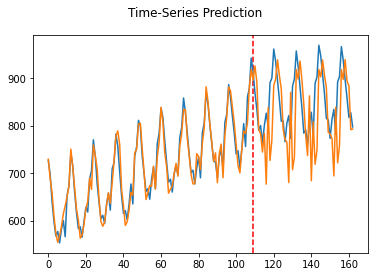

In [242]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

#print(sc.inverse_transform(data_predict))
print(len(data_predict))

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [243]:
def futurepred(steps):

    training_set2 = pd.read_csv('AAPL.csv')

    training_set2 = training_set2.iloc[:,3].values
    training_set2 = training_set2.reshape(-1,1)
    #print(training_set2[:5])
    training_data2 = sc.fit_transform(training_set2)
    #print(len(training_data2))
    #print(training_data2[:5])

    box = []
    start = len(training_data2) 
    a = start - 5
    a=1253

    while a<len(training_data2):
        #box.append(training_data2[a:])
       # print(a)
       # print(training_data2[a])
        box.append(training_data2[a])
        a = a+1
        
    #print(len(training_data2) - 5)
    #print(a)
    #print(box)
    x2,y2  = sliding_windows(training_data2,4)
    dataf = Variable(torch.Tensor(x2[1252:]))
    #print(x2[1250:])
    fut_predict = lstm(dataf)
    #print (fut_predict)
    #trainX = Variable(torch.Tensor(np.array(training_data[start:])))
    training_set2 = np.append(training_set2,fut_predict.detach().numpy())
   #print(training_set2)


futurepred(5)

    

In [244]:
def futurepred(steps):
    training_set3 = pd.read_csv('d2.csv')
    training_set3 = training_set3.iloc[:,1:2].values
    a = 0
    box = []

    while a<steps:

        if a == 0:
            training_g = training_set3.reshape(-1,1)
            training_g = sc.transform(training_g)
        else:
            training_g = training_g.reshape(-1,1)    

        #print("---")
        #print(training_g)
        #print(len(training_g[a:]))

        x2,_  = sliding_windows(training_g[a:],4)
        input_index = len(x2) - 1
        #print(training_g[-1])

        dataf2 = Variable(torch.Tensor(x2[input_index:]))
        #print(dataf2)
        fut_predict2 = lstm(dataf2)
        #print (fut_predict2)
    
        training_g = np.append(training_g,fut_predict2.detach().numpy())
        #print(sc.inverse_transform(fut_predict2.detach().numpy()))
        box.append(sc.inverse_transform(fut_predict2.detach().numpy()))
        a = a+1
    
    #print(training_set3)
    return box
b = futurepred(50)

In [245]:
def FUTsliding_windows(data, seq_length):
    x = []
    a = 1 

    for i in range(a):
        _x = data[i:(i+seq_length)]
        x.append(_x)

    return np.array(x)


In [246]:
def futurepred(steps):
    training_set3 = pd.read_csv('d2.csv')
    training_set3 = training_set3.iloc[:,1:2].values
    training_set3 = sc.fit_transform(training_set3)
    a = 0
    box = []

    while a<steps:
        training_g = training_set3.reshape(-1,1)
        training_g = np.array(training_g[-4:])

        data_g = Variable(torch.Tensor(training_g.reshape(1,4,1)))
        output = lstm(data_g)
        
        training_set3 = np.append(training_set3,output.detach().numpy())
        box.append(sc.inverse_transform(output.detach().numpy()))
        print(output)
        a = a+1

    return box        


fut_output = futurepred(200)

tensor([[0.4580]], grad_fn=<AddmmBackward0>)
tensor([[0.4569]], grad_fn=<AddmmBackward0>)
tensor([[0.2653]], grad_fn=<AddmmBackward0>)
tensor([[0.4603]], grad_fn=<AddmmBackward0>)
tensor([[0.4799]], grad_fn=<AddmmBackward0>)
tensor([[0.7508]], grad_fn=<AddmmBackward0>)
tensor([[0.6317]], grad_fn=<AddmmBackward0>)
tensor([[0.5894]], grad_fn=<AddmmBackward0>)
tensor([[0.6640]], grad_fn=<AddmmBackward0>)
tensor([[0.6167]], grad_fn=<AddmmBackward0>)
tensor([[0.5047]], grad_fn=<AddmmBackward0>)
tensor([[0.3403]], grad_fn=<AddmmBackward0>)
tensor([[0.2160]], grad_fn=<AddmmBackward0>)
tensor([[0.1849]], grad_fn=<AddmmBackward0>)
tensor([[0.0741]], grad_fn=<AddmmBackward0>)
tensor([[0.0834]], grad_fn=<AddmmBackward0>)
tensor([[0.0774]], grad_fn=<AddmmBackward0>)
tensor([[0.1710]], grad_fn=<AddmmBackward0>)
tensor([[0.2300]], grad_fn=<AddmmBackward0>)
tensor([[0.2004]], grad_fn=<AddmmBackward0>)
tensor([[0.2882]], grad_fn=<AddmmBackward0>)
tensor([[0.3255]], grad_fn=<AddmmBackward0>)
tensor([[0

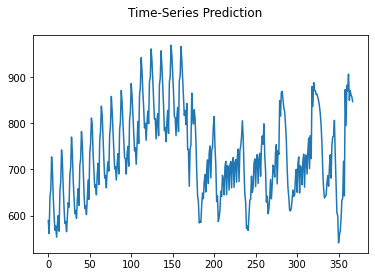

In [247]:
fut_output_list = []
z=0
while z < len(fut_output):
    fut_output_list.append(np.array(fut_output[z]))
    z =z+1

dataf = np.append(training_set,fut_output_list)
plt.plot(dataf)
plt.suptitle('Time-Series Prediction')
plt.show()